## Análisis de KMedias

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from prince import MCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

In [4]:
data = pd.read_csv('../../data/data.csv', delimiter='|')

In [5]:
# Seleccionar columnas relevantes
selected_columns = ['EXA_PRC_RTAS_CORR', 'ESTU_GENERO', 'EXA_INSTRUMENTO', 'EXA_COMPONENTE']
cluster_data = data[selected_columns].copy()

# Codificar las características categóricas
categorical_cols = ['ESTU_GENERO', 'EXA_INSTRUMENTO', 'EXA_COMPONENTE']
for col in categorical_cols:
    cluster_data[col] = cluster_data[col].astype('category').cat.codes

# Estandarizar las características numéricas
cluster_data['EXA_PRC_RTAS_CORR'] = (cluster_data['EXA_PRC_RTAS_CORR'] - cluster_data['EXA_PRC_RTAS_CORR'].mean()) / cluster_data['EXA_PRC_RTAS_CORR'].std()

# Separar datos numéricos y categóricos
numeric_data = cluster_data[['EXA_PRC_RTAS_CORR']]
categorical_data = cluster_data[categorical_cols]

In [6]:
# Aplicar PCA a las características numéricas
pca = PCA(n_components=1)
numeric_transformed = pca.fit_transform(numeric_data)

# Aplicar MCA a las características categóricas
mca = MCA(n_components=2)
categorical_transformed = mca.fit_transform(categorical_data)

In [7]:
# Combinar las características transformadas
combined_transformed = np.hstack((numeric_transformed, categorical_transformed))

In [8]:
# Determinar el número óptimo de clusters usando el método del codo para K-means
inertia = []
for num_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(combined_transformed)
    inertia.append(kmeans.inertia_)

c:\anaconda3\envs\DataIcfes\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\DataIcfes\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\DataIcfes\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\DataIcfes\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

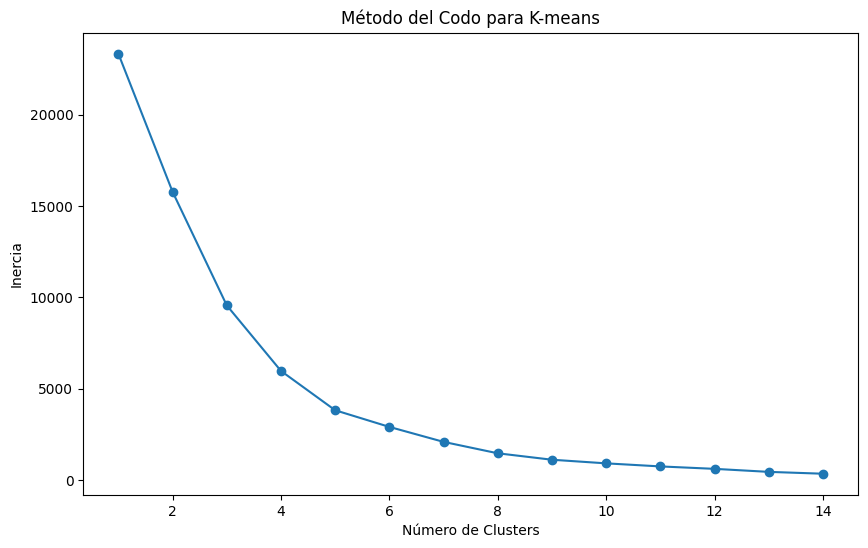

In [9]:
# Graficar la inercia vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.show()

Esto sugiere que elegir 5 clusters

In [10]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(combined_transformed)

c:\anaconda3\envs\DataIcfes\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

### Gráficos de dispersión

In [11]:
kmeans.labels_.shape

(10000,)

In [12]:
categorical_cols

['ESTU_GENERO', 'EXA_INSTRUMENTO', 'EXA_COMPONENTE']

In [13]:
kmeans.labels_

array([2, 1, 3, ..., 1, 1, 0])

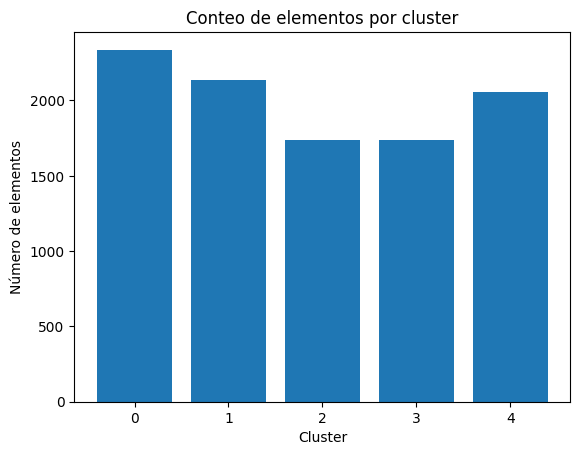

In [14]:
# Supongamos que labels es el arreglo con las etiquetas de cluster
labels = kmeans.labels_
label_counts = Counter(labels)

# Gráfico de barras
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Cluster')
plt.ylabel('Número de elementos')
plt.title('Conteo de elementos por cluster')
plt.show()